# 📌 Problem Statement

- Generate **1000 samples** from a **uniform distribution** over the interval [-1, 1]:

  $$
  x \sim U(-1, 1)
  $$

- Use the **histogram method** to estimate the **probability density function (PDF)** of the distribution based on these samples.

- Choose an appropriate **bin width** $\Delta x$ (or equivalently, determine the number of bins).

- Finally, **plot the histogram estimate** of the PDF to visualize your approximation.



# ✅ Goal

- Understand how to **estimate an unknown distribution** using the **histogram technique** based on sample data.

- Observe how choices like **bin width $\Delta x$** impact the quality and smoothness of the estimated PDF.

---

# ✍️ Notes on Histogram Estimation

- The histogram provides a **non-parametric estimate** of the PDF:

  $$
  \hat{f}(x) = \frac{\text{Number of samples in bin}}{N \times \Delta x}
  $$

  where:
  - $N$ = total number of samples
  - $\Delta x$ = bin width (size of each interval)

- The histogram plot should approximate the **true PDF**, which for a uniform distribution over [-1, 1] is:

  $$
  f(x) = 
  \begin{cases}
  0.5, & -1 < x < 1 \\
  0, & \text{otherwise}
  \end{cases}
  $$

---

# 🚀 Visualization

- The histogram allows you to visually compare the **empirical distribution** (from your samples) to the **theoretical uniform distribution**.

- By adjusting $\Delta x$, you control the balance between:
  - **Variance** (too small $\Delta x$ → noisy estimate),
  - **Bias** (too large $\Delta x$ → oversmooth estimate).

---


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from src.parzen_pdf_estimation import gaussian_parzen_estimation
from src.knn_pdf_estimation import knn_estimation

In [3]:
n_samples = 1000
x = np.random.uniform(-1, 1, n_samples)

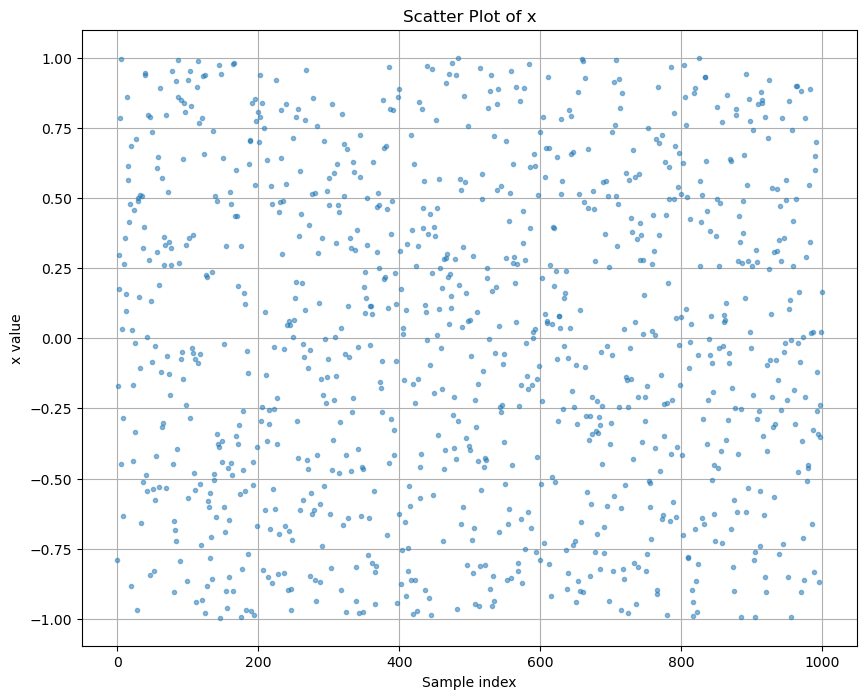

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(x, '.', alpha=0.5)
plt.title('Scatter Plot of x')
plt.xlabel('Sample index')
plt.ylabel('x value')
plt.grid(True)
plt.show()

In [5]:
num_bins = int(np.sqrt(n_samples))
delta_x = 2 / num_bins

# counts, bin_edges = np.histogram(x, bins=num_bins, range=(-1, 1))

bin_edges = np.linspace(-1, 1, num=(num_bins + 1))

In [6]:
counts = np.zeros(num_bins)

for value in x:
    for i in range(num_bins):
        if bin_edges[i] <= value < bin_edges[i+1]:
            counts[i] +=1
            break

    if value == bin_edges[-1]:
        counts[-1] += 1

In [7]:
pdf_estimates = counts / (n_samples * delta_x)

In [8]:
bin_center = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(num_bins)]
print(f"Lenght of bin_center: {len(bin_center)}")

Lenght of bin_center: 31


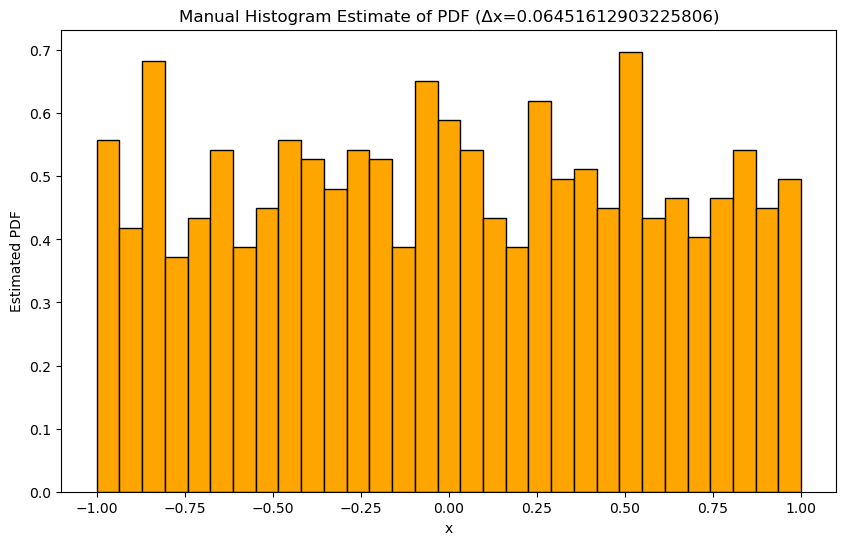

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(bin_center, pdf_estimates, width=delta_x, color='orange', edgecolor='black')
plt.title(f"Manual Histogram Estimate of PDF (Δx={delta_x})")
plt.xlabel("x")
plt.ylabel("Estimated PDF")
plt.grid(False)
plt.show()

# Estimating Probability Density using Parzen Window with Gaussian Kernel

## 🎯 Objective
To estimate the probability density function (PDF) of a dataset **without knowing the original distribution**, using a non-parametric method.

## 📌 Core Idea
Place a **kernel function** (e.g., a Gaussian bump) on top of each data point, and average all the kernels to build an estimate of the overall density.

## 📘 PDF Estimation Formula

Given a point $x$, the estimated density is:

$$
\hat{f}_h(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

Where:

- $n$: Number of data samples  
- $h$: Bandwidth (window width)  
- $x_i$: Data points  
- $K(u)$: Kernel function (e.g., Gaussian)

## 🔹 Gaussian Kernel

The Gaussian kernel is defined as:

$$
K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
$$

This kernel is symmetric, smooth, and widely used due to its good mathematical properties.

## ⚠️ Role of Bandwidth $h$

- **Small $h$** → Very noisy estimate (overfitting)  
- **Large $h$** → Too smooth and blurry (underfitting)  
- **Proper $h$** → A good balance that captures the overall shape



Text(0.5, 1.0, 'Parzen PDF Estimation')

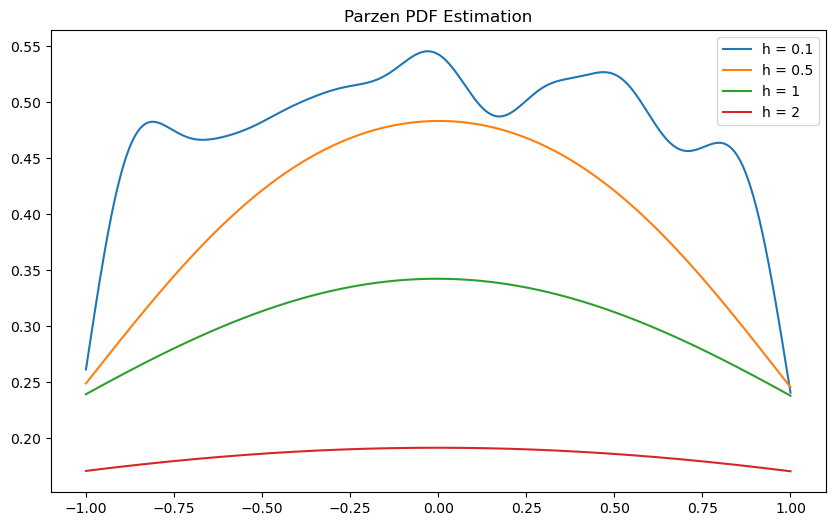

In [10]:
hs = [0.1, 0.5, 1, 2]
points = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 6))

for h in hs:
    estimated = [gaussian_parzen_estimation(point, samples=x, h=h) for point in points]
    plt.plot(points, estimated, label=f'h = {h}')
plt.legend()
plt.title('Parzen PDF Estimation')


- **Parzen Window Estimation** with Gaussian kernels produces a **smooth and continuous** estimate of the probability density function (PDF).  
- The **bandwidth parameter ($h$)** controls the smoothness:
  - Small $h$ → overfitting (too many fluctuations).
  - Large $h$ → underfitting (loss of detail).
- Among the tested values, **$h = 0.5$ or $h = 1.0$** provided the best balance between detail and smoothness for the uniform distribution.

- In contrast, the **Histogram Method** provides a **discrete and blocky** estimate.  
  - It is **sensitive to bin size and bin alignment**, and shows significant fluctuations due to random sampling noise—even though the true distribution is uniform.

### ✅ Conclusion:
Parzen estimation offers a more reliable and visually interpretable approximation of the true PDF compared to histograms. Proper tuning of the bandwidth $h$ is essential to avoid overfitting or underfitting.


___

## 📘 K-Nearest Neighbors (KNN) PDF Estimation

### 🧠 Concept:
KNN-based density estimation is a non-parametric method that estimates the probability density at a point $x$ by measuring how far one must go from $x$ to include $k$ nearest data points.

Unlike the Parzen window method, where the **window width ($h$) is fixed**, in KNN the **number of neighbors ($k$) is fixed** and the **window width (volume)** is adaptive based on data density.



### 📐 Formula (1D case):

For each evaluation point $x$:

$$
\hat{f}_k(x) = \frac{k}{n \cdot V(x)} = \frac{k}{n \cdot 2r}
$$

Where:
- $k$ = number of nearest neighbors
- $n$ = total number of samples
- $r$ = distance from $x$ to its $k$-th nearest neighbor
- $V(x) = 2r$ is the volume (length) of the window in 1D



### ✅ Characteristics:

| Feature        | Description |
|----------------|-------------|
| Adaptive       | Automatically adjusts the window width depending on local data density |
| Local Sensitivity | High resolution in dense areas, smoother in sparse areas |
| Hyperparameter | $k$ controls the smoothness: small $k$ → noisy; large $k$ → smooth |
| Advantage      | More flexible than fixed-bandwidth methods like Parzen |



### 🔧 Implementation Steps:
1. For each point $x$ where you want to estimate the density:
   - Compute the absolute distances to all sample points.
   - Sort distances and select the $k$-th smallest distance ($r$).
   - Use the formula $\hat{f}_k(x) = \frac{k}{n \cdot 2r}$ to estimate the density.



This method is especially useful when data is unevenly distributed, as it naturally adapts to local density variations.


In [28]:
# Evaluation points and k values
ks = [1, 5, 20, 50]
points = np.linspace(-1, 1, 1000)

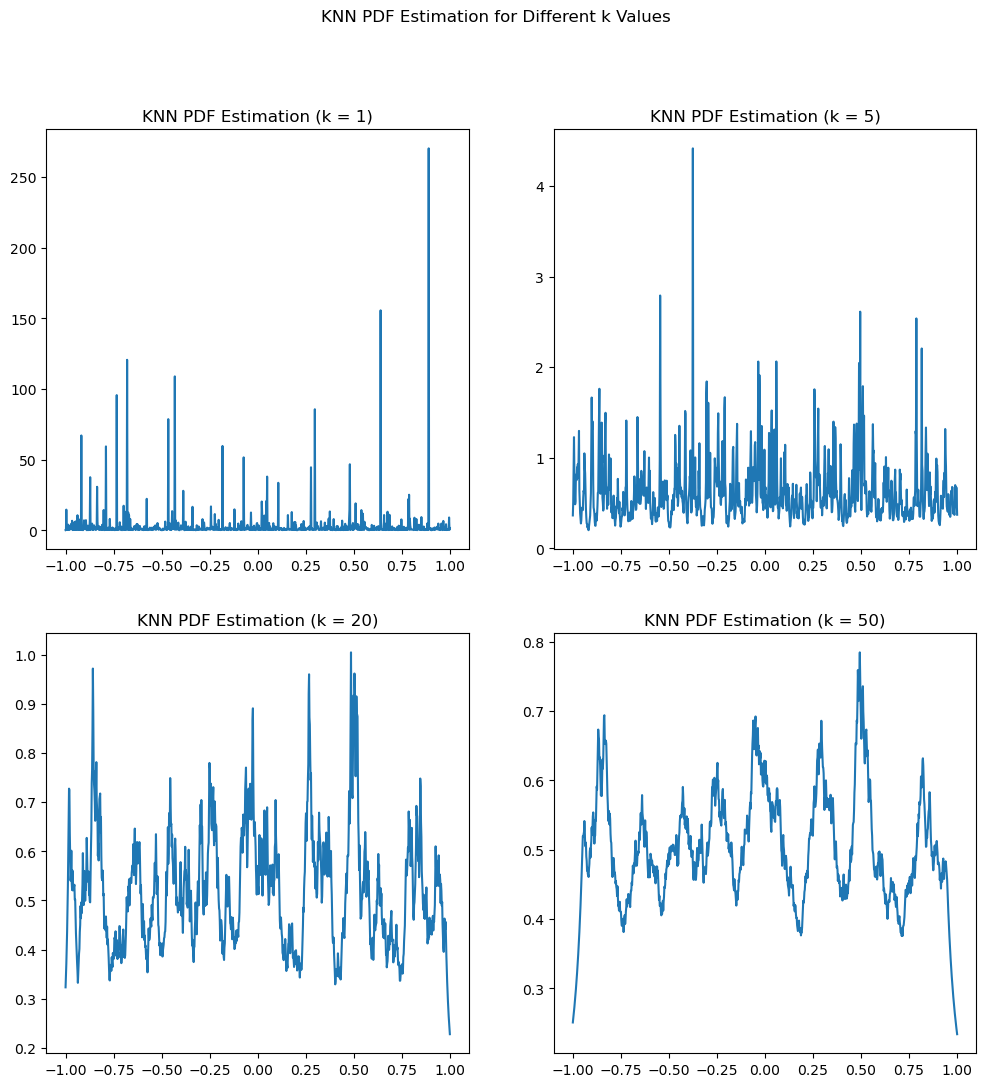

In [29]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2):
    for j in range(2):
        k = ks[i * 2 + j]
        estimations = [knn_estimation(point, samples=x, k=k) for point in points]
        ax[i, j].plot(points, estimations)
        ax[i, j].set_title(f'KNN PDF Estimation (k = {k})')

plt.suptitle('KNN PDF Estimation for Different k Values')
plt.show()

In [30]:
# Evaluation points and k values
ks = [100, 150, 200, 250]
points = np.linspace(-1, 1, 1000)

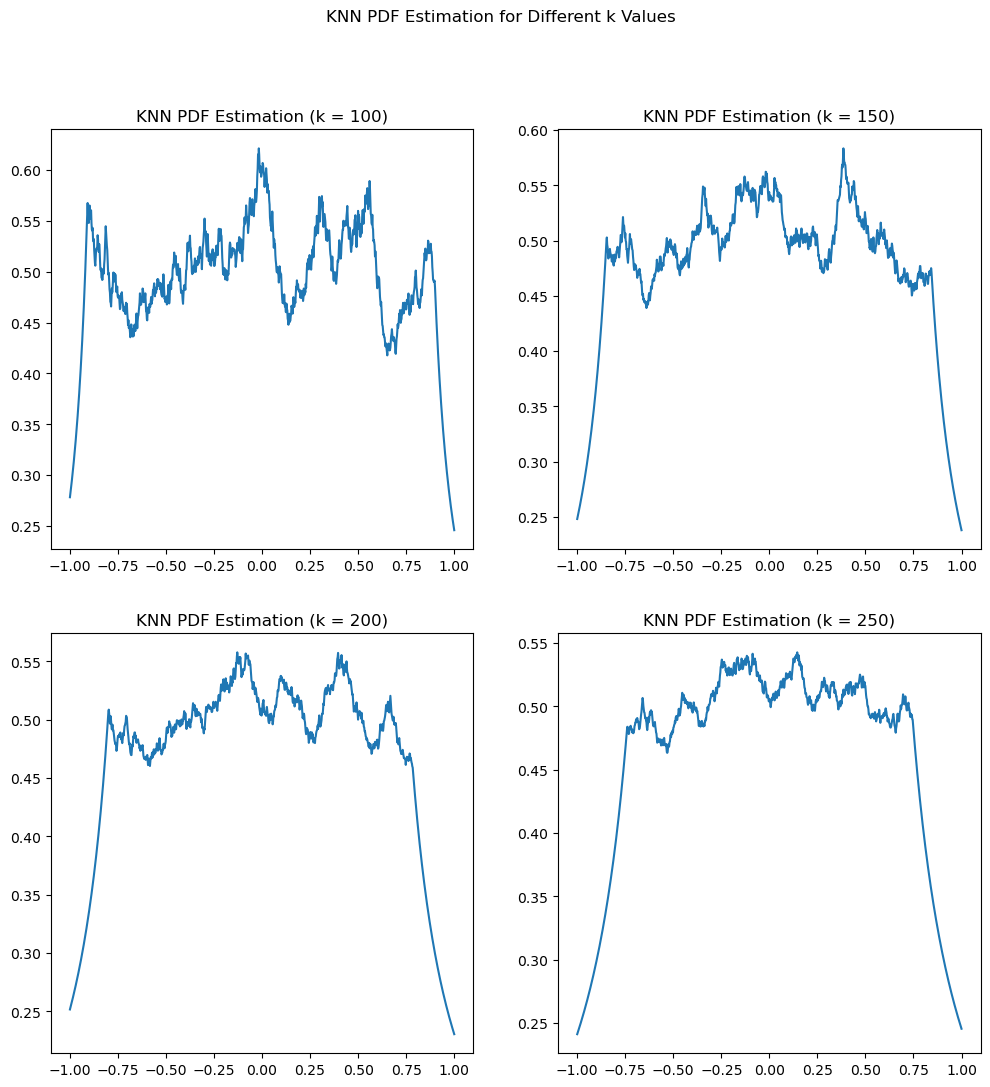

In [31]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2):
    for j in range(2):
        k = ks[i * 2 + j]
        estimations = [knn_estimation(point, samples=x, k=k) for point in points]
        ax[i, j].plot(points, estimations)
        ax[i, j].set_title(f'KNN PDF Estimation (k = {k})')

plt.suptitle('KNN PDF Estimation for Different k Values')
plt.show()

## 📊 Analysis: KNN PDF Estimation for Different Values of k

We estimated the probability density function (PDF) using the K-Nearest Neighbors method for various values of \( k \in \{1, 5, 20, 50, 100, 150, 200, 250\} \). Below is an analysis of how changing \( k \) affects the behavior of the estimated density:

---

### 🔁 General Trend:
- **Small \( k \)** → High variance, overfitting
- **Large \( k \)** → Smoother curves, but risk of underfitting

---

### 🧪 Detailed Observations:

| k | Behavior | Analysis |
|---|----------|----------|
| **1** | Extremely noisy, tall spikes | Severe overfitting; model is too sensitive to individual data points |
| **5** | Still noisy, less extreme | Slight improvement, but still high variance |
| **20** | Noticeably smoother, moderate peaks | Reasonable balance between detail and smoothness |
| **50** | Clear structure, reduced noise | One of the most interpretable and stable results |
| **100** | Smooth with preserved bumps | Good for overall structure, still reflects density patterns |
| **150–250** | Very smooth and flat | Over-smoothing; local variations are mostly lost; underfitting may occur |

---

### ✅ Conclusion:
- **Recommended Range:** \( k \in [20, 100] \) provides the best trade-off between resolution and smoothness.
- **Too small \( k \):** Leads to very unstable and unreliable density estimates.
- **Too large \( k \):** Oversmooths the true density and hides meaningful variations in data.

Choosing the optimal \( k \) depends on the dataset size and the desired balance between detail and generality.

